In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
happiness_file = "WHR2021_Data.csv"

#Read df into pandas 
happiness_df = pd.read_csv(happiness_file)
happiness_df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [3]:
covid_deaths_file = "country_case_df.csv"

covid_deaths_file = pd.read_csv(covid_deaths_file)
covid_deaths_file.head()

,Unnamed: 0,country,confirmed,deaths,population,sq_km_area,life_expectancy,elevation_in_meters,continent,abbreviation,location,iso,capital_city,percentage_confirmed_%,percentage_deaths_%
0,0,Afghanistan,148572,6804,35530081,652090.0,45.9,NaN,Asia,AF,Southern and Central Asia,4.0,Kabul,0.418158,0.019150
1,1,Albania,133211,2457,2930187,28748.0,71.6,NaN,Europe,AL,Southern Europe,8.0,Tirana,4.546160,0.083851
2,2,Algeria,175229,4370,41318142,2381741.0,69.7,800,Africa,DZ,Northern Africa,12.0,Alger,0.424097,0.010576
3,3,Andorra,14766,128,76965,468.0,83.5,"1,996",Europe,AD,Southern Europe,20.0,Andorra la Vella,19.185344,0.166309
4,4,Angola,43070,1022,29784193,1246700.0,38.3,"1,112",Africa,AO,Central Africa,24.0,Luanda,0.144607,0.003431


In [4]:
covid_deaths_file.rename(columns={"country":"Country name", "deaths":"Deaths"}, inplace=True)

In [5]:
covid_deaths_file.head()

,Unnamed: 0,Country name,confirmed,Deaths,population,sq_km_area,life_expectancy,elevation_in_meters,continent,abbreviation,location,iso,capital_city,percentage_confirmed_%,percentage_deaths_%
0,0,Afghanistan,148572,6804,35530081,652090.0,45.9,NaN,Asia,AF,Southern and Central Asia,4.0,Kabul,0.418158,0.019150
1,1,Albania,133211,2457,2930187,28748.0,71.6,NaN,Europe,AL,Southern Europe,8.0,Tirana,4.546160,0.083851
2,2,Algeria,175229,4370,41318142,2381741.0,69.7,800,Africa,DZ,Northern Africa,12.0,Alger,0.424097,0.010576
3,3,Andorra,14766,128,76965,468.0,83.5,"1,996",Europe,AD,Southern Europe,20.0,Andorra la Vella,19.185344,0.166309
4,4,Angola,43070,1022,29784193,1246700.0,38.3,"1,112",Africa,AO,Central Africa,24.0,Luanda,0.144607,0.003431


In [6]:
merge_df = pd.merge(happiness_df, covid_deaths_file, on="Country name", how="outer")
merge_df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,sq_km_area,life_expectancy,elevation_in_meters,continent,abbreviation,location,iso,capital_city,percentage_confirmed_%,percentage_deaths_%
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,...,338145.0,77.4,164,Europe,FI,Nordic Countries,246.0,Helsinki [Helsingfors],1.961859,0.017816
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,...,43094.0,76.5,34,Europe,DK,Nordic Countries,208.0,Copenhagen,5.588369,0.044510
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,...,41284.0,79.6,"1,350",Europe,CH,Western Europe,756.0,Bern,8.503334,0.128669
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,...,103000.0,79.4,557,Europe,IS,Nordic Countries,352.0,Reykjav,2.457429,0.008955
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,...,41526.0,78.3,30,Europe,NL,Western Europe,528.0,Amsterdam,11.166165,0.106369


In [7]:
merged_question_11_df = merge_df.groupby(["Country name","Logged GDP per capita"]).sum()[["Deaths"]]
merged_question_11_df.head()

,,Deaths
Country name,Logged GDP per capita,
Afghanistan,7.695,6804.0
Albania,9.520,2457.0
Algeria,9.342,4370.0
Argentina,9.962,106447.0
Armenia,9.487,4621.0


In [8]:
GDP_to_Deaths_df = merged_question_11_df.sort_values(by='Deaths', ascending=False)
GDP_to_Deaths_df

,,Deaths
Country name,Logged GDP per capita,
Brazil,9.577,558432.0
India,8.755,425195.0
Mexico,9.859,241936.0
Peru,9.458,196598.0
Russia,10.189,158263.0
...,...,...
Congo (Brazzaville),8.117,0.0
Turkmenistan,9.629,0.0
Swaziland,9.065,0.0


In [9]:
GDP_to_Deaths_df['Natural log of Deaths'] = np.log(GDP_to_Deaths_df['Deaths'])
GDP_to_Deaths_df

/Users/Max/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,,Deaths,Natural log of Deaths
Country name,Logged GDP per capita,,
Brazil,9.577,558432.0,13.232888
India,8.755,425195.0,12.960303
Mexico,9.859,241936.0,12.396429
Peru,9.458,196598.0,12.188916
Russia,10.189,158263.0,11.972013
...,...,...,...
Congo (Brazzaville),8.117,0.0,-inf
Turkmenistan,9.629,0.0,-inf
Swaziland,9.065,0.0,-inf


In [10]:
GDP_to_Deaths_df.reset_index(inplace=True)

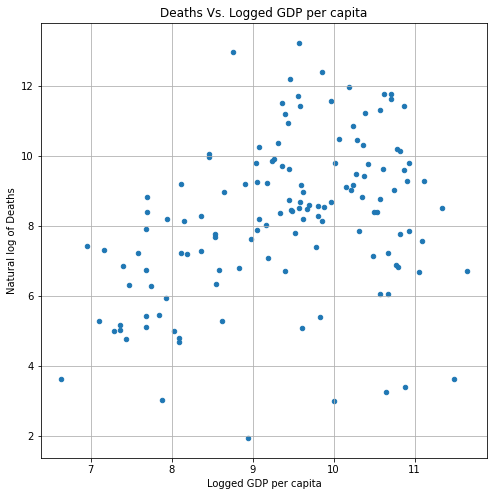

In [11]:
GDP_to_Deaths_df.plot(kind="scatter", x="Logged GDP per capita", y="Natural log of Deaths", grid=True, figsize=(8,8), title="Deaths Vs. Logged GDP per capita")
plt.show()